[ 20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100 105]
80 75
CGLS Algorithm in progress.
Estimated time until completion : 00:00:00
re-initilization of CGLS called at iteration:1
Algorithm exited with two consecutive reinitializations.
SART algorithm in progress.
Estimated time until completion : 00:00:01
SIRT algorithm in progress.
Estimated time until completion : 00:00:00


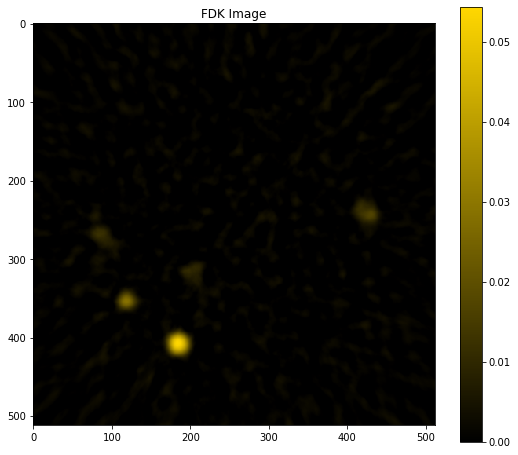

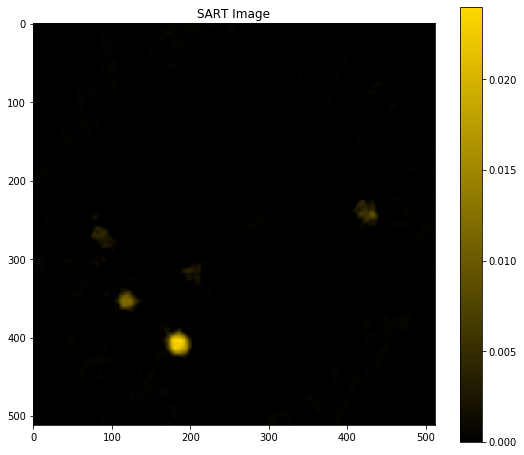

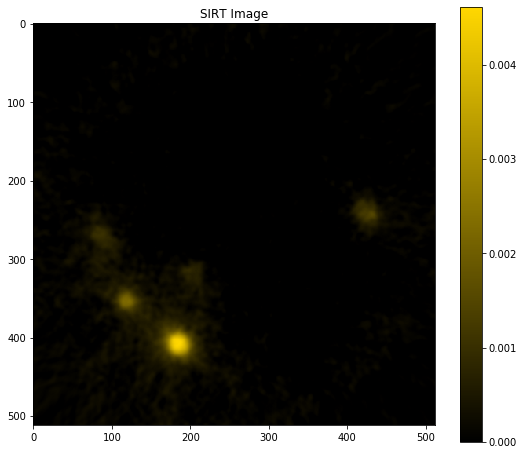

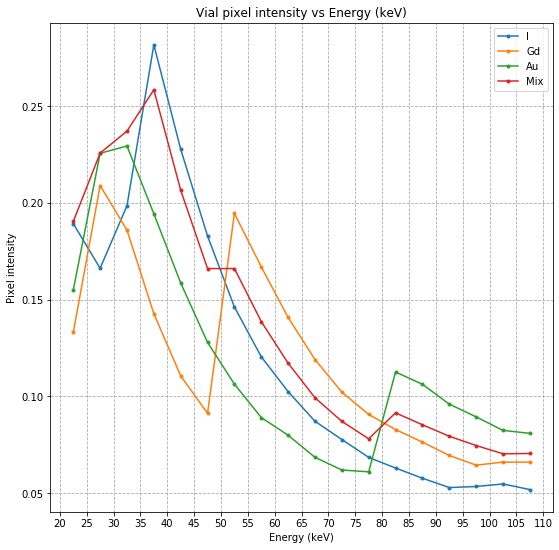

In [39]:
import tigre
import numpy as np
import tigre.algorithms as algs
from matplotlib import pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure
from skimage.transform import iradon
from matplotlib.colors import LinearSegmentedColormap

bin_width=5
bins=np.arange(20,110,bin_width)
master_counts=np.load("Desktop/CT imaging/master_counts_strip_8deg.npy")
master_counts=np.squeeze(master_counts)
master_binned=np.zeros((45,96,int(np.ceil(len(bins)))))
for k in np.arange(0,len(bins)):
    for i in np.arange(0,45):
        for j in np.arange(0,96):
            master_binned[i][j][k]=master_counts[i][j][int(np.around((20+bin_width*k)/0.2)):int(np.around((((20+bin_width*(k+1))/0.2))))].mean()
master_binned=np.transpose(master_binned)
master_counts=master_binned
master_counts=np.swapaxes(master_counts,1,2)
for i in np.arange(0,len(master_counts)):
    master_counts[i][4]=np.insert(master_counts[i][4][:-1],0,0)
    master_counts[i][38]=np.insert(master_counts[i][38][:-1],0,0)
master_counts=np.swapaxes(master_counts,1,2)

print(bins)
print(bins[12],bins[11])
subtraction=master_counts[12]-master_counts[11]
subtraction = np.copy((subtraction.T)[:,np.newaxis,:]).astype(np.float32)


#Geometry--------------------------------------------------------------------------
geo = tigre.geometry()
# VARIABLE                                   DESCRIPTION                    UNITS
# -------------------------------------------------------------------------------------
# Distances
geo.DSD = 1086 # Distance Source Detector      (mm)
geo.DSO = 626 # Distance Source Origin        (mm)
# Image parameters
geo.nVoxel = np.array([1, 512, 512])  # number of voxels              (vx)
geo.sVoxel = np.array([1, 120, 120])  # total size of the image       (mm)
geo.dVoxel = geo.sVoxel / geo.nVoxel  # size of each voxel            (mm)
# Detector parameters
geo.nDetector = np.array([1, 96])  # number of pixels              (px)
geo.dDetector = np.array([geo.dVoxel[0], 1.25])  # size of each pixel            (mm)
geo.sDetector = geo.nDetector * geo.dDetector  # total size of the detector    (mm)
# Offsets
geo.offOrigin = np.array([0, 0, 0])  # Offset of image from origin   (mm)
geo.offDetector = np.array([0, 0])  # Offset of Detector            (mm)
# MAKE SURE THAT THE DETECTOR PIXELS SIZE IN V IS THE SAME AS THE IMAGE!

# Offsets
geo.offOrigin = np.array([0, 0, 0])  # Offset of image from origin   (mm)
geo.offDetector = np.array([0, 0])  # Offset of Detector            (mm)

geo.mode = "parallel"

angles = np.arange(0,2*np.pi,(2*np.pi)/45)
theta=angles


#Colormaps
cmap = LinearSegmentedColormap.from_list(name='gold',colors=['black','gold'])
plt.register_cmap('gold', cmap)

#Algorithms------------------------------------------------------------------------
niter=5

#FDK
imgFDK= algs.fdk(subtraction, geo, angles, filter='hann')
imgFDK=np.squeeze(imgFDK)
imgFDK[imgFDK<0] = 0
# CGLS
imgCGLS = algs.cgls(subtraction, geo, angles, niter)
imgCGLS=np.squeeze(imgCGLS)
imgCGLS[imgCGLS<0] = 0
# SART
imgSART = algs.sart(subtraction, geo, angles, niter)
imgSART=np.squeeze(imgSART)
imgSART[imgSART<0] = 0

#SIRT
imgSIRT= algs.sirt(subtraction,geo,angles,niter)
imgSIRT=np.squeeze(imgSIRT)
imgSIRT[imgSIRT<0] = 0

# # FISTA
# imgFISTA = algs.fista(subtraction, geo, angles, niter)
# imgFISTA=np.squeeze(imgFISTA)
# imgFISTA[imgFISTA<0] = 0

# # ASDPOCS
# imgASDPOCS = algs.asd_pocs(subtraction, geo, angles, niter)
# imgASDPOCS=np.squeeze(imgASDPOCS)
# imgASDPOCS[imgASDPOCS<0] = 0

# # AWASDPOCS
# imgAWASDPOCS = algs.awasd_pocs(subtraction, geo, angles, niter)
# imgAWASDPOCS=np.squeeze(imgAWASDPOCS)
# imgAWASDPOCS[imgAWASDPOCS<0] = 0



#Display -------------------------------------------------------------------------------------------
figure(1,figsize=(9,8))
plt.imshow(imgFDK,cmap='gold')
plt.colorbar()
plt.title('FDK Image')

# figure(2,figsize=(9,8))
# plt.imshow(imgCGLS,cmap='gold')
# plt.colorbar()
# plt.title('CGLS Image')

figure(3,figsize=(9,8))
plt.imshow(imgSART,cmap='gold')
plt.colorbar()
plt.title('SART Image')
figure(4,figsize=(9,8))
plt.imshow(imgSIRT,cmap='gold')
plt.colorbar()
plt.title('SIRT Image')

# figure(5,figsize=(9,8))
# plt.imshow(imgFISTA,cmap='gold')
# plt.colorbar()
# plt.title('FISTA Image')

# figure(6,figsize=(9,8))
# plt.imshow(imgASDPOCS,cmap='gold')
# plt.colorbar()
# plt.title('ASD_POCS Image')

# figure(7,figsize=(9,8))
# plt.imshow(imgAWASDPOCS,cmap='gold')
# plt.colorbar()
# plt.title('AWASD_POCS Image')


#Vial coordinates 512x512
coordsI5 =[[i+235,j+82] for i in np.arange(0,10) for j in np.arange(0,10)] 
coordsI3 =[[i+155,j+115] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsI1=[[i+247,j+168] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsGd5=[[i+348,j+388] for i in np.arange(0,10) for j in np.arange(0,10)] 
coordsGd3=[[i+407,j+323] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsGd1=[[i+315,j+307] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsAu5=[[i+180,j+402] for i in np.arange(0,10) for j in np.arange(0,10)] 
coordsAu3=[[i+117,j+351] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsAu1=[[i+198,j+315] for i in np.arange(0,5) for j in np.arange(0,5)]
coordsMix33=[[i+420,j+235] for i in np.arange(0,10) for j in np.arange(0,10)]
coordsMix2=[[i+82,j+268] for i in np.arange(0,10) for j in np.arange(0,10)]
coords0=[[i+98,j+181] for i in np.arange(0,5) for j in np.arange(0,5)]

# Pixel intensity vs energy for each vial
images=[]
for i in np.arange(0,len(bins)):
    images.append(algs.fdk(np.copy((np.array(master_counts[i]).T)[:,np.newaxis,:]).astype(np.float32), geo, angles, filter='hann'))
    images[i][images[i]<0]=0
    
mask=np.zeros(shape=(512,512))
for x,y in coordsI5:
    mask[int(y)][int(x)]=1
vial1=mask*images
vial1[vial1==0]=np.nan
vial1_mean=[np.nanmean(i) for i in vial1]

mask=np.zeros(shape=(512,512))
for x,y in coordsGd5:
    mask[int(y)][int(x)]=1
vial2=mask*images
vial2[vial2==0]=np.nan
vial2_mean=[np.nanmean(i) for i in vial2]

mask=np.zeros(shape=(512,512))
for x,y in coordsAu5:
    mask[int(y)][int(x)]=1
vial3=mask*images
vial3[vial3==0]=np.nan
vial3_mean=[np.nanmean(i) for i in vial3]

mask=np.zeros(shape=(512,512))
for x,y in coordsMix33:
    mask[int(y)][int(x)]=1
vial4=mask*images
vial4[vial4==0]=np.nan
vial4_mean=[np.nanmean(i) for i in vial4]

#intensity of vials vs energy
figure(8,figsize=(9,9))
plt.plot(bins+bin_width/2,vial1_mean,marker='.',label='I')
plt.plot(bins+bin_width/2,vial2_mean,marker='.',label='Gd')
plt.plot(bins+bin_width/2,vial3_mean,marker='.',label='Au')
plt.plot(bins+bin_width/2,vial4_mean,marker='.',label='Mix')
plt.title('Vial pixel intensity vs Energy (keV)')
plt.grid(linestyle='--',c='darkgray')
plt.xlabel('Energy (keV)')
plt.ylabel('Pixel intensity') 
plt.locator_params(axis="x", nbins=30)
plt.legend()
